In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import nibabel as nib
import os
from glob import glob
from classes import NiftiDataset, RandomCrop3D

In [2]:
def show_slices(slices, titles=[]):
    """ Function to display row of image slices """
    if titles:
        if len(slices) != len(titles):
            raise Exception('Wrong number of titles specified.')
            
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        if titles:
            axes[i].set_title(titles[i])
            
    plt.tight_layout()

# Setup

In [3]:
data_dir = 'small'
t1_dir = os.path.join(data_dir, 't1')
t2_dir = os.path.join(data_dir, 't2')
nifti_dataset = NiftiDataset(t1_dir, t2_dir)

# Cropping  

In [4]:
crop = RandomCrop3D(42)
sample = nifti_dataset[0]
transformed_sample = crop(sample)

In [5]:
sample['source'].shape

(120, 120, 90)

In [6]:
transformed_sample['source'].shape

(42, 42, 42)

# Image visualization

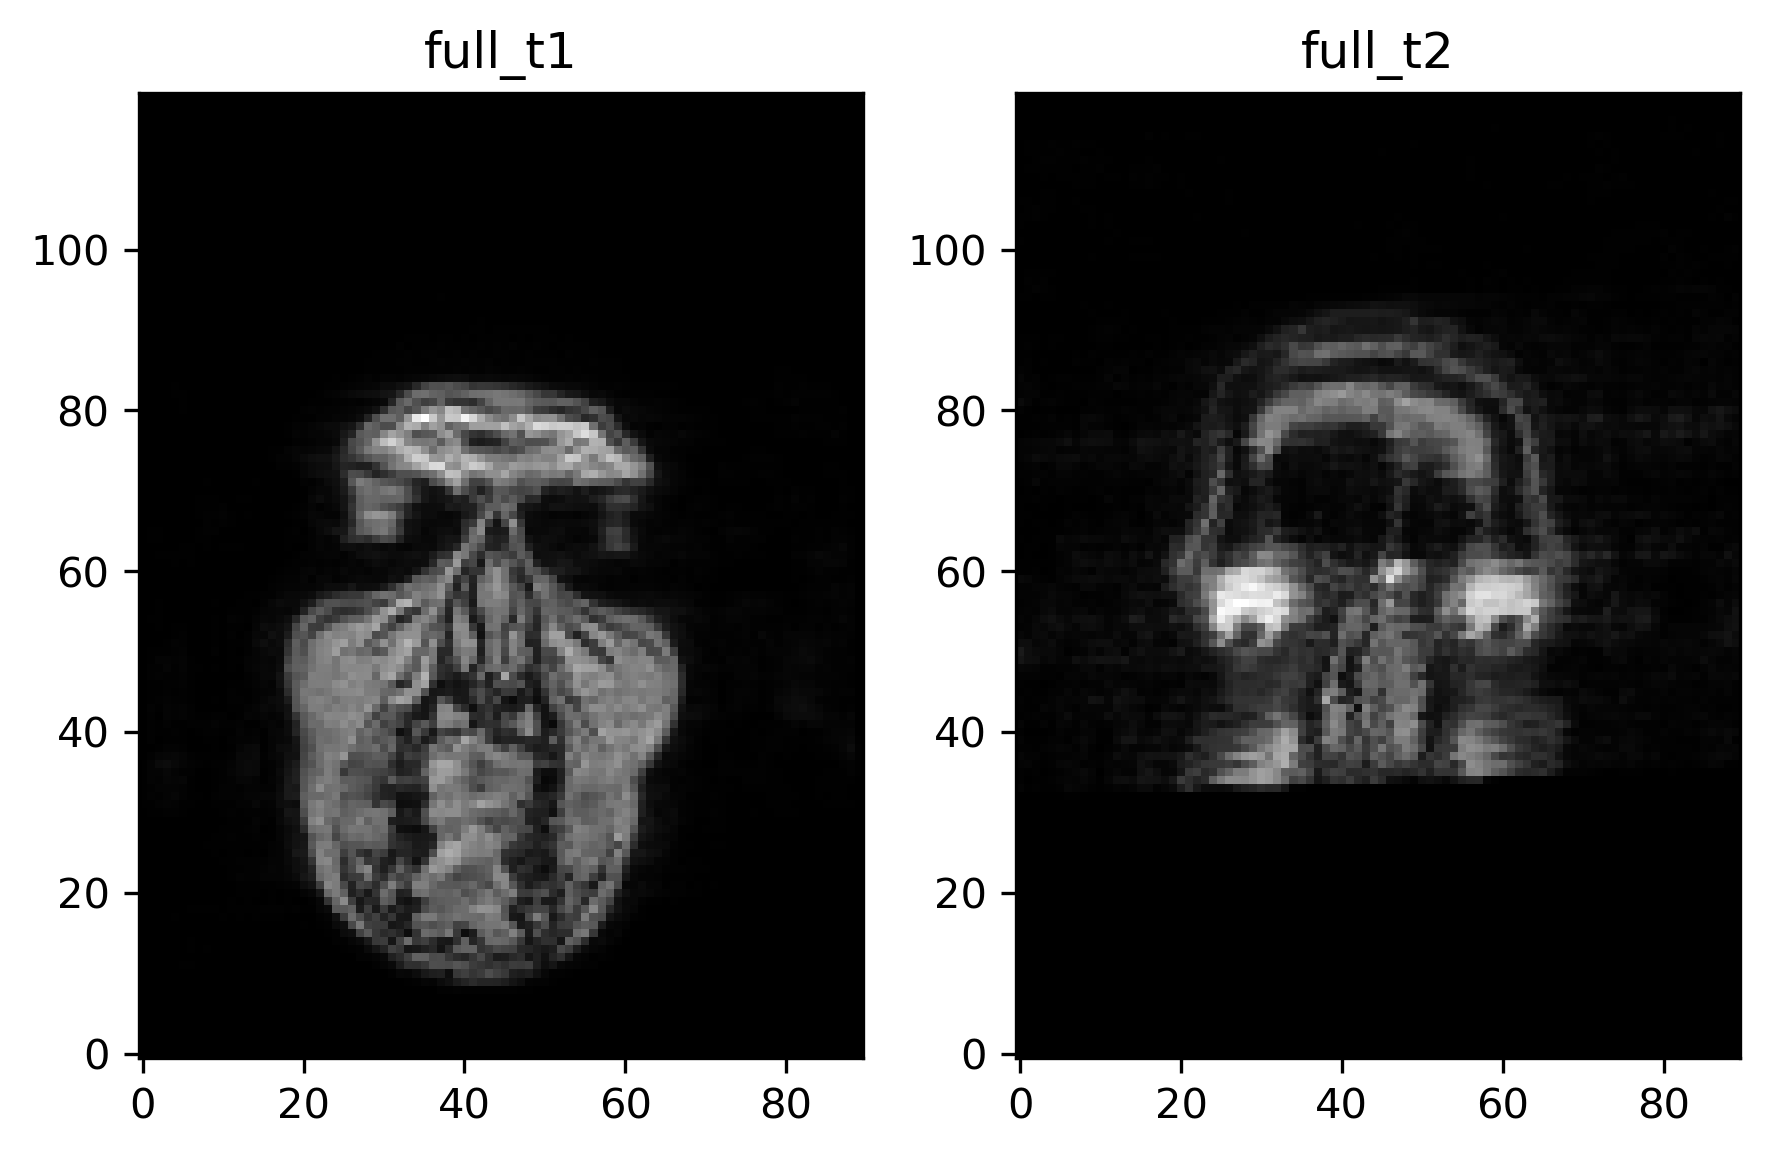

In [7]:
with plt.rc_context({"figure.dpi": 300}):
    slice_t1 = sample['source'][21, :, :].T
    slice_t2 = sample['target'][21, :, :].T
    show_slices([slice_t1, slice_t2], titles=['full_t1', 'full_t2'])

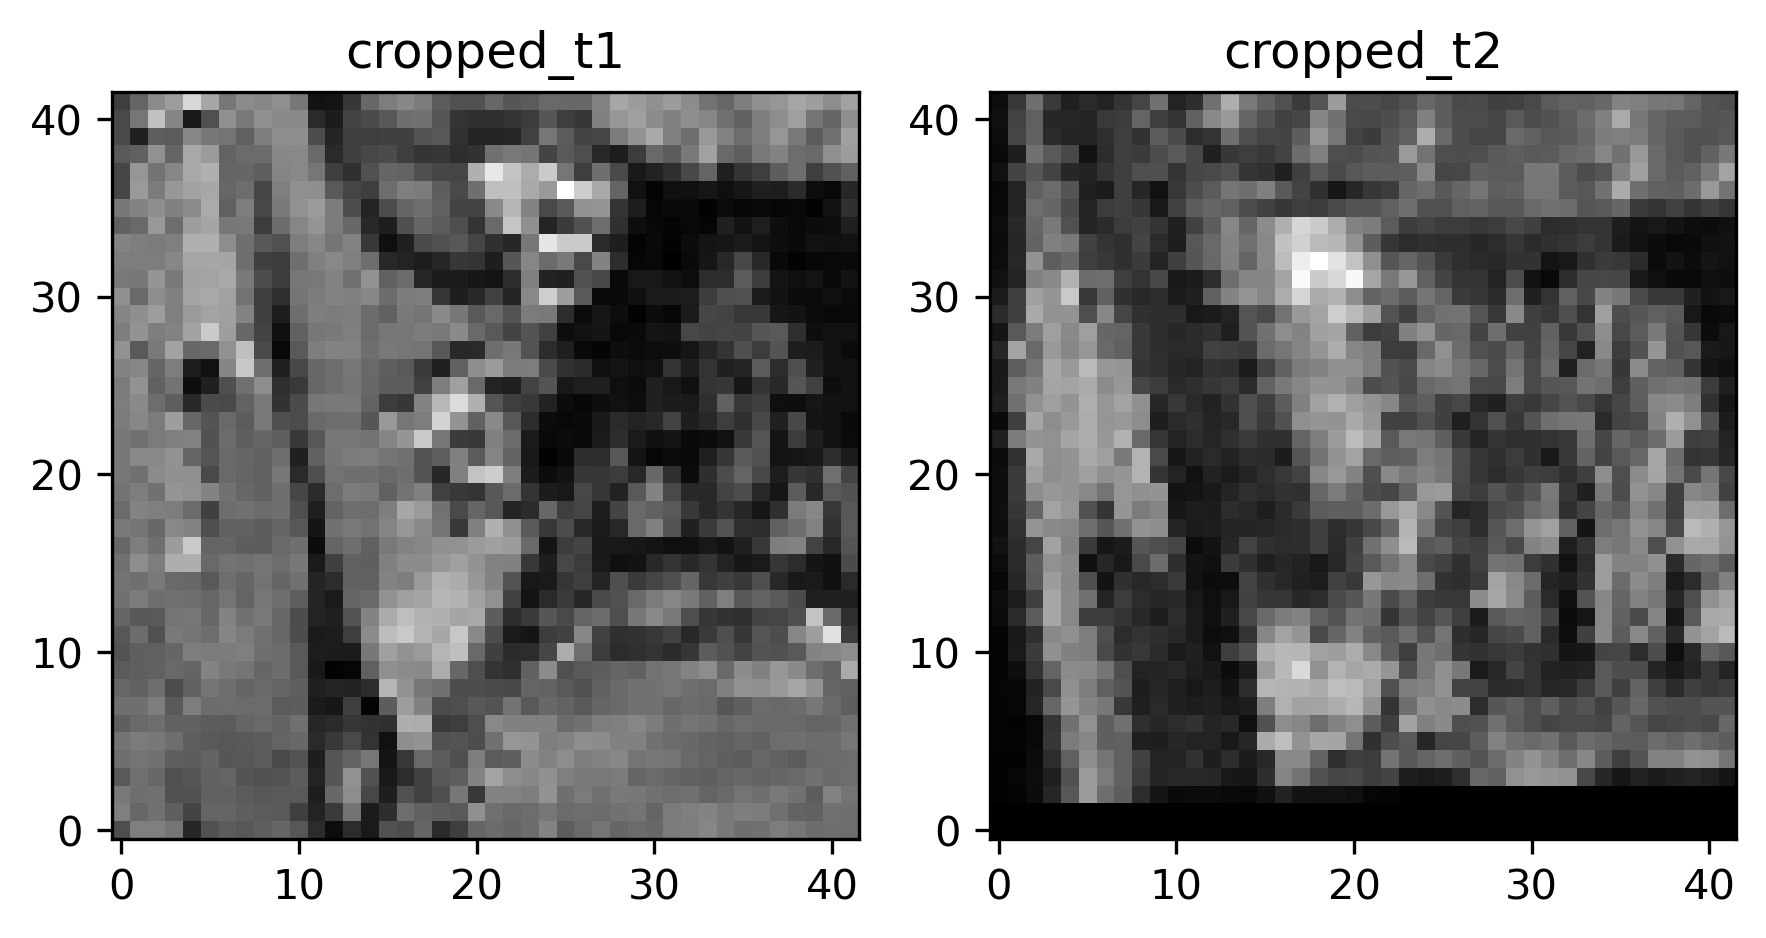

In [8]:
with plt.rc_context({"figure.dpi": 300}):
    slice_t1 = transformed_sample['source'][21, :, :].T
    slice_t2 = transformed_sample['target'][21, :, :].T
    show_slices([slice_t1, slice_t2], titles=['cropped_t1', 'cropped_t2'])